In [1]:
import numpy

# Модель "Хищник-Жертва"

In [2]:
var('x, y') #популяции видов от t

time_points = numpy.linspace(0,7,71) #генерация временных точек
state_0 = [2, 1]
a,b,c,d = 3,3,1,1 

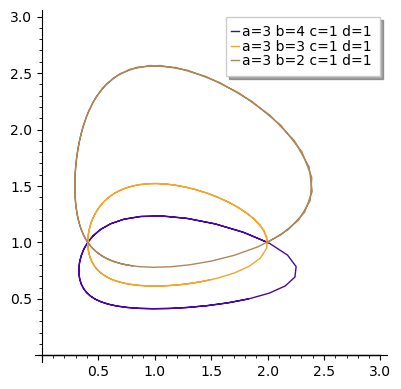

In [3]:
g = plot(0, (x, 0, 3), color='black')  #холст куда все соберем
for b in range(4,1,-1):
    st = f"a={a} b={b} c={c} d={d}"
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) 
    f = [x*(a-b*y),y*(-c+d*x)] #система уранений
    sol = desolve_odeint(f, state_0, time_points, dvars=[x, y]) #решение ДУ
    g += line(sol, rgbcolor=rgb, legend_label=st)
g.show(xmin=0, xmax=3, ymin=0, ymax=3, aspect_ratio=1)

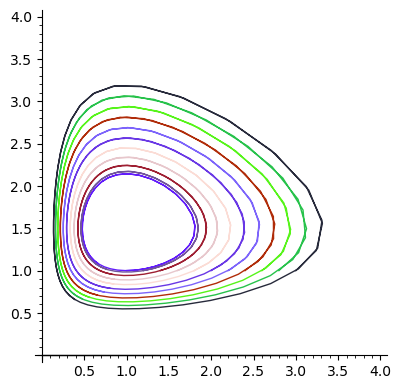

In [4]:
ic = numpy.linspace(1.0, 3.0, 11)
g = plot(0, (x, 0, 3), color='black')  #холст куда все соберем
for r in ic:
    state_0 = [r, 1.0]
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) 
    f = [x*(a-b*y),y*(-c+d*x)] #система уранений
    sol = desolve_odeint(f, state_0, time_points, dvars=[x, y]) #решение ДУ
    g += line(sol, rgbcolor=rgb)
g.show(xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1) 

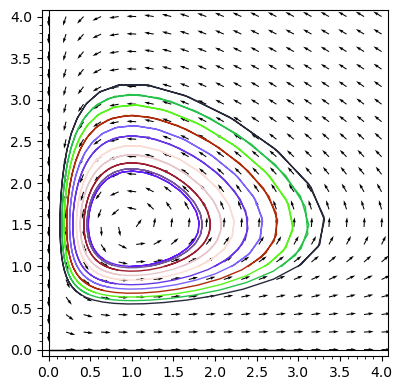

In [5]:
f1 = x*(a-b*y) 
f2 = y*(-c+d*x)
f_tup = (f1 / sqrt(f1**2 + f2**2), f2 / sqrt(f1**2 + f2**2)) #нормированние
g += plot_vector_field(f_tup,(x,0,4),(y,0,4)) #добавляем вектор-стрелочки
g.show(xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1)

# Падение тела брошенного под углом к горизонту

In [6]:
var("y1, y2, y3, y4") #переменные

time_points = numpy.linspace(0,7,300) #точки времени
alpha = numpy.pi/4 #угол
v0 = 10.0 #начальная скорость
state_0 = [0, v0*numpy.cos(alpha), 0, v0*numpy.sin(alpha)] #x Vx y Vy
k = 0.01 #сопротивление среды
G = 9.81 #ускорение свободного падения

In [7]:
f = [y2, -k*y2*sqrt(y2**2+y4**2), y4, -k*y2*sqrt(y2**2+y4**2)-G] #функция
sol = desolve_odeint(f, state_0, time_points, dvars=[y1, y2, y3, y4]) #решение ДУ

In [8]:
Y = numpy.array(sol) #получаем ndarray
plot_arr = numpy.vstack((Y[:, 0], Y[:, 2])).T #получение пар значений
g = line(plot_arr)

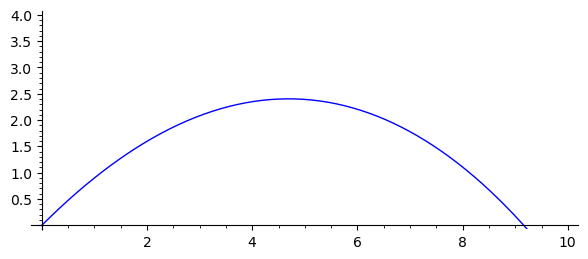

In [9]:
g.show(xmin=0, xmax=10, ymin=0, ymax=4, aspect_ratio=1) #отображение графика

In [10]:
g = plot(0, (x, 0, 3), color='black')
K = [0.1, 0.2, 0.3, 0.5] #значения сопротивлений среды
for k in K:
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) 
    f = [y2, -k*y2*sqrt(y2**2+y4**2), y4, -k*y2*sqrt(y2**2+y4**2)-G] 
    sol = desolve_odeint(f, state_0, time_points, dvars=[y1, y2, y3, y4]) #решение ДУ
    Y = numpy.array(sol) 
    plot_arr = numpy.vstack((Y[:, 0], Y[:, 2])).T #получение пар значений
    g += line(plot_arr, rgbcolor=rgb) 

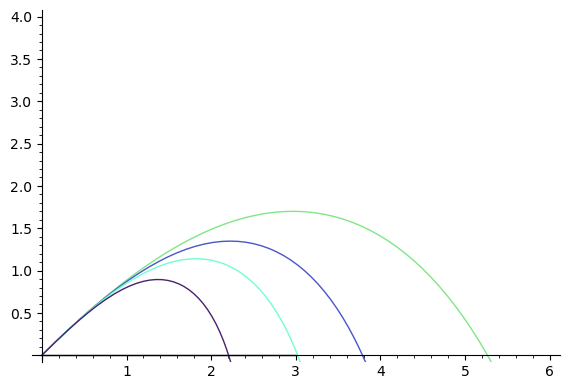

In [11]:
g.show(xmin=0, xmax=6, ymin=0, ymax=4, aspect_ratio=1)